In [51]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [22]:
print(X.head())
print('--------------------------------')
print(X.info())
print('--------------------------------')
print(X.describe())
print('--------------------------------')
print(X.columns)
print('--------------------------------')
print(X.index)
print('--------------------------------')
print(X.shape)
print('--------------------------------')

# cp 가슴 통증 1~4 경도순 4가 무증상
# trestbps 안정시 혈압
# chol 콜레스테롤
# fbs 공복혈당 120 초과일 경우 1 아니면 0
# restecg 안정시 심전도 결과 0 정상, 1이면 ST-T wave, 2 좌심실 비대증
# thalach 운동 중 최대 심박수
# exang 운동 중 협심증 1 or 0
# oldpeak 운동 시 안정 상태와 비교했을 때 ST 분절 감소
# slope 운동 시 ST segment의 기울기 1 상승, 2 평평, 3 하강
# ca 염색이 잘 된 관상동맥 숫자
# thal 심근 관류 스캔 3정상 6회복불가 7비정상이나 치료가능성 있음
# num 심장병 진단 0 무증상 1~4 증상 있음

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs    

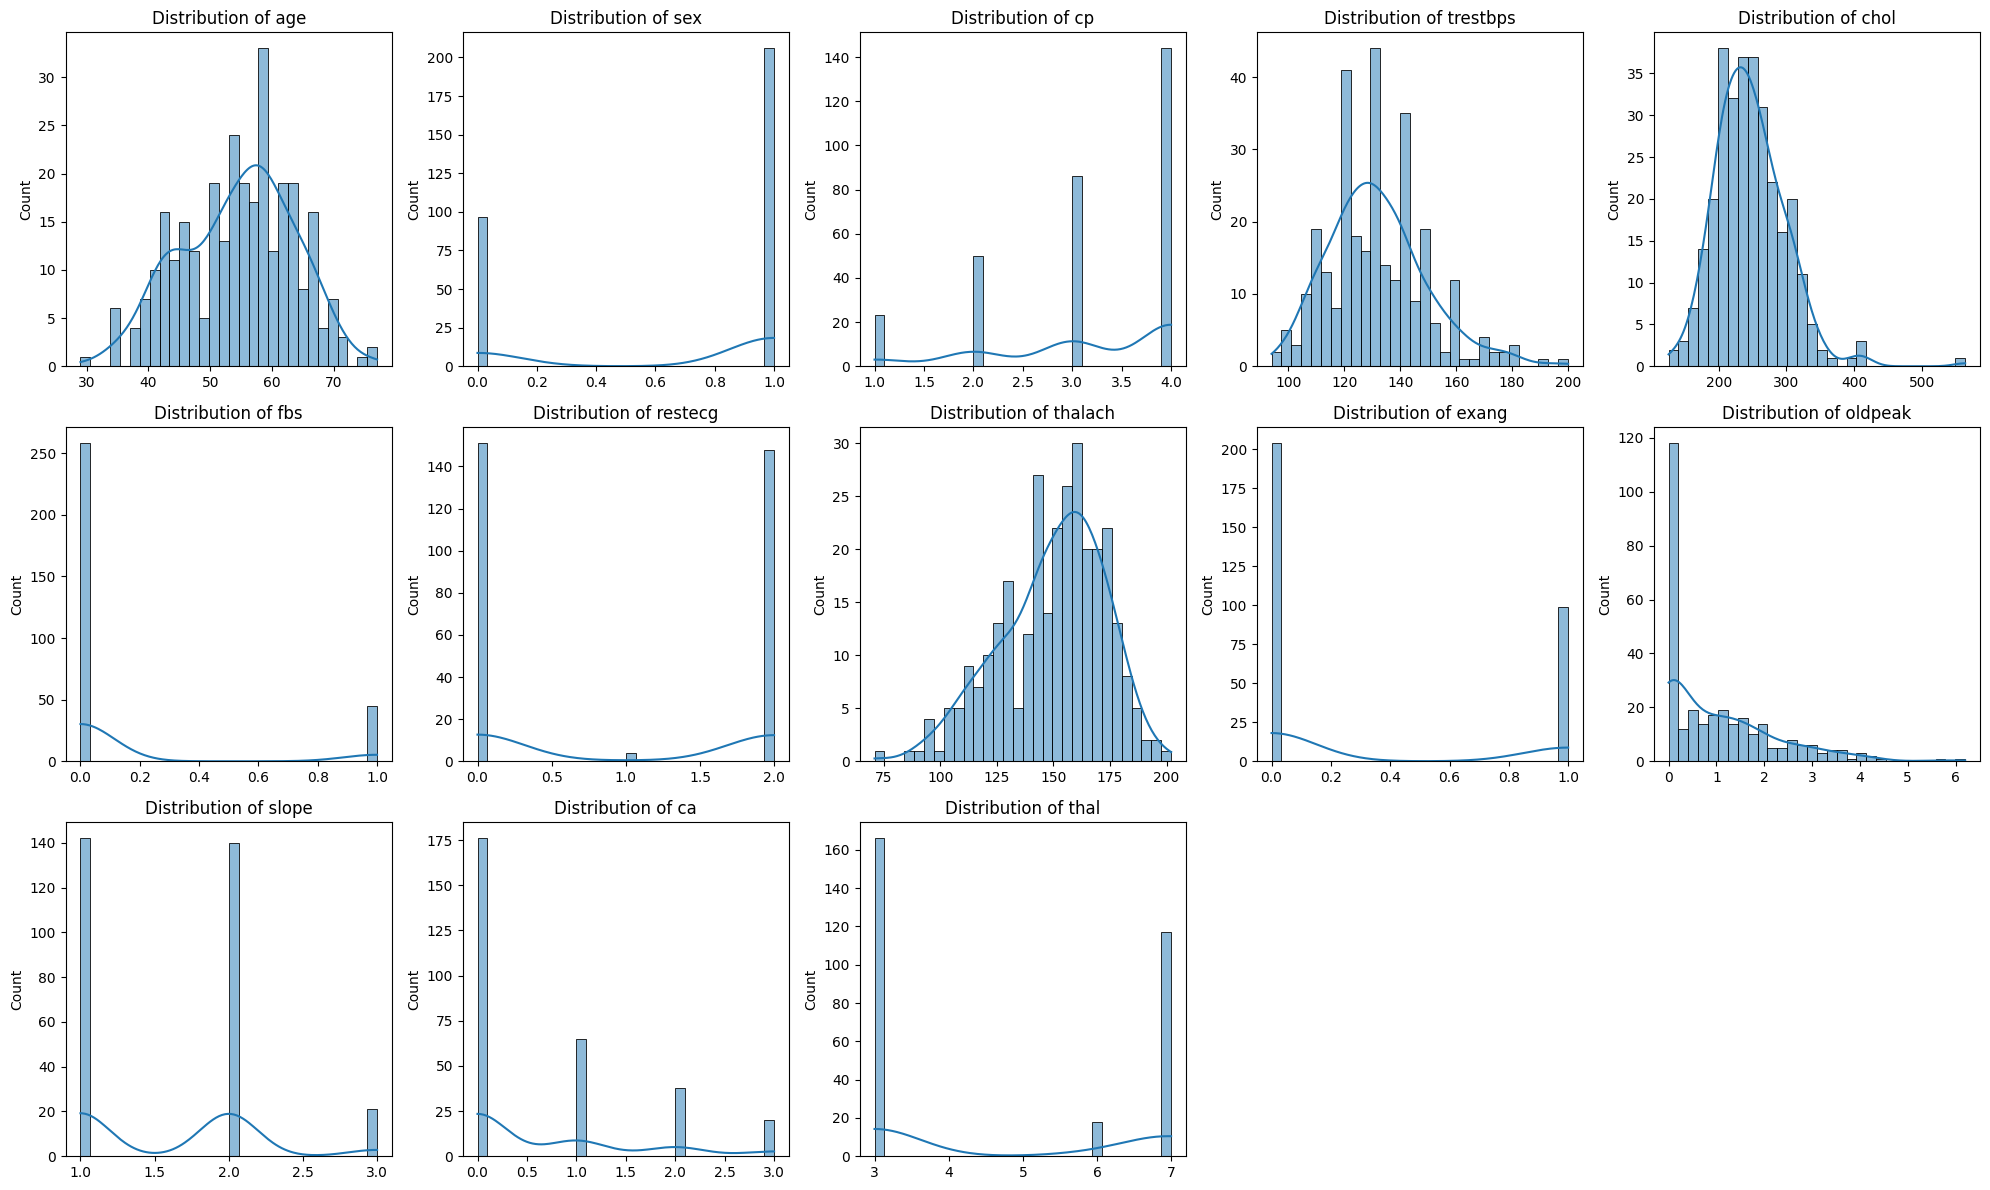

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_features = list(X.columns)
n_cols = 5
n_rows = math.ceil(len(n_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
ax = axes.flatten()

for i, col in enumerate(X.columns):
    sns.histplot(
        data=X,
        x=col,
        kde=True,
        ax=ax[i],
        bins=30
    )
    ax[i].set_title(f'Distribution of {col}', fontsize=12)
    ax[i].set_xlabel('')

for i in range(len(n_features), len(ax)):
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

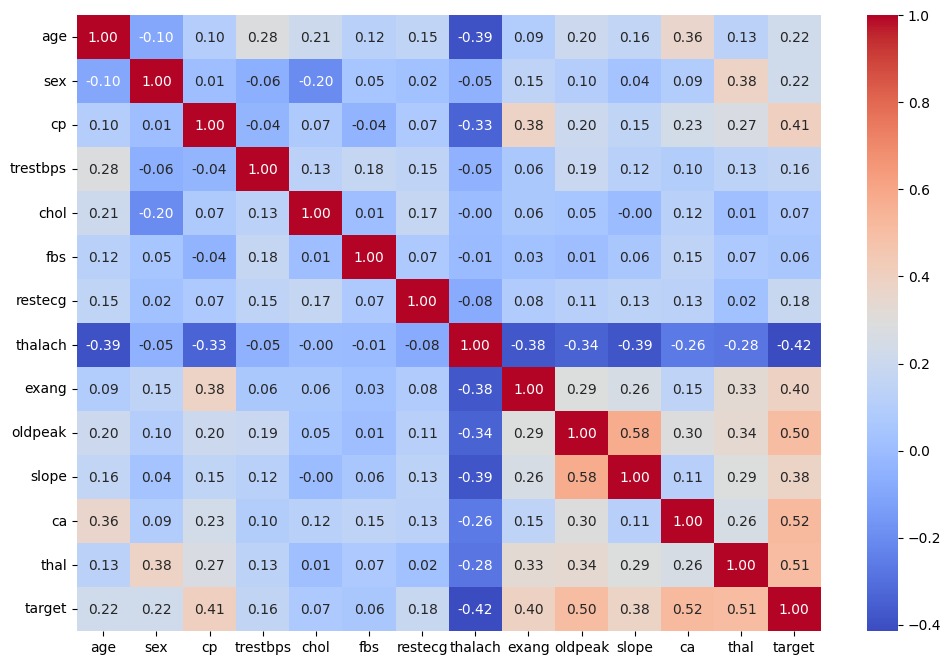

In [24]:
corr_df = X.copy()
corr_df['target'] = y
corr_features = list(corr_df.columns)

plt.figure(figsize=(12,8))
sns.heatmap(corr_df[corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [52]:
import pandas as pd

X = X.fillna(0)

# 범주형 변수 라벨 인코딩
from sklearn.preprocessing import LabelEncoder # object를 범주형으로 바꿀 때
from sklearn.preprocessing import OneHotEncoder # 범주형 변수를 원-핫 인코딩

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # 쉬운 예시

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

X_final = pd.concat([
    X.drop(columns=categorical_cols).reset_index(drop=True),
    pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
], axis=1)

In [76]:
# train test split
from sklearn.model_selection import train_test_split

# xgboost
import xgboost as xgb

# y = y.squeeze()

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2)

model = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=5,
)
    # subsample=0.8, # 데이터 샘플링 비율
    # colsample_bytree=0.8, # 피쳐 샘플링 비율
    # objective='multi:softprob',
    # reg_lambda=1, # L2 정규화
    # reg_alpha=0, # L1 정규화
    # num_class=5,
    # eval_metric='mlogloss'
    
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [77]:
# 예측
y_pred = model.predict(X_test)

# 예측 결과 확인
print(y_pred)

# 정확도 확인
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy:.4f}")

# 혼동행렬
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[1 0 1 0 0 2 0 2 0 0 0 0 1 0 0 4 0 0 3 3 0 0 1 0 0 0 0 0 3 4 1 0 3 0 1 0 0
 3 0 0 2 2 4 0 0 2 0 0 0 0 2 1 3 3 1 0 0 1 0 3 1]
정확도: 0.4590
[[25  3  3  1  1]
 [ 6  1  0  2  1]
 [ 2  1  0  3  0]
 [ 0  4  3  1  0]
 [ 1  1  0  1  1]]
